In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None
test = pd.read_csv('test.csv')
train= pd.read_csv('train.csv')
gndr= pd.read_csv('gender_submission.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [30]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:xlabel='SibSp'>

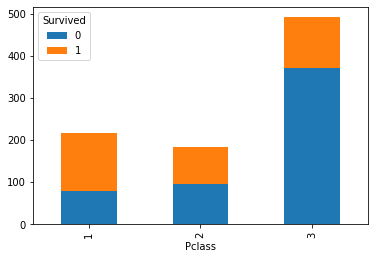

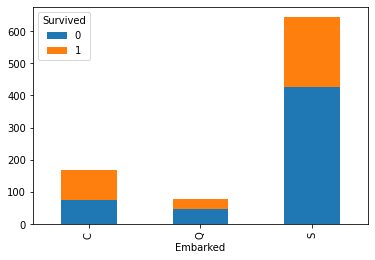

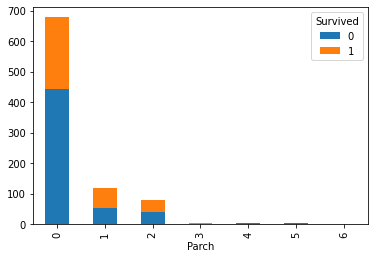

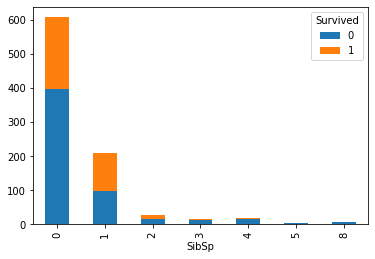

In [31]:
train.pivot_table('PassengerId', 'Pclass', 'Survived', 'count').plot(kind='bar', stacked=True)
train.pivot_table('PassengerId', 'Embarked', 'Survived', 'count').plot(kind='bar', stacked=True)
train.pivot_table('PassengerId', 'Parch', 'Survived', 'count').plot(kind='bar', stacked=True)
train.pivot_table('PassengerId', 'SibSp', 'Survived', 'count').plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

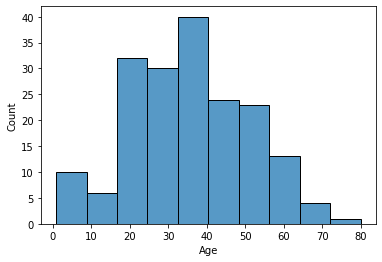

In [32]:
copy = train.copy()
copy.dropna(inplace = True)
sns.histplot(copy["Age"])

In [33]:
print(test.isnull().sum(),train.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [34]:
test.drop(columns=['PassengerId','Ticket','Cabin'], inplace=True)
gndr.drop(columns=['PassengerId'], inplace=True)
train.drop(columns=['PassengerId','Ticket','Cabin'], inplace=True)

In [39]:
def scale(test):
    scaler = StandardScaler()
    age_test = np.array(test["Age"]).reshape(-1, 1)
    fare_test = np.array(test["Fare"]).reshape(-1, 1)
    test["Age"] = scaler.fit_transform(age_test)
    test["Fare"] = scaler.fit_transform(fare_test)
    return test

In [40]:
test=scale(test)
train=scale(train)

In [41]:
def cnv(test):
    for i in range(len(test)):
        test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    eb_mapping = {"Q": 1, "S": 2,"C":3}
    test['Embarked']=test['Embarked'].map(eb_mapping)
    ttl_mapping = {"Mr": 1, "Miss": 2,"Mrs":3,"Master": 4, "Col": 5,"Rev":6,"Dona": 7, "Ms": 8,"Dr":9,"Mlle":10,"Major": 11, "Don": 12,"Jonkheer":13,"Countess":14,"Sir":15, "Mme":16,"Capt":17,"Lady":18}
    test['Title']=test['Title'].map(ttl_mapping)
    test.drop(columns=['Name'], inplace=True)
    sex_mapping = {"male": 1, "female": 0}
    test['Sex']=test['Sex'].map(sex_mapping)
    return test

In [42]:
test=cnv(test)
train=cnv(train)

In [43]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,0.298549,0,0,-0.497811,1,1
1,3,0,1.181328,1,0,-0.512660,2,3
2,2,1,2.240662,0,0,-0.464532,1,1
3,3,1,-0.231118,0,0,-0.482888,2,1
4,3,0,-0.584229,1,1,-0.417971,2,3
...,...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,-0.493856,2,1
414,1,0,0.616350,0,0,1.312180,3,7
415,3,1,0.581038,0,0,-0.508183,2,1
416,3,1,NaN,0,0,-0.493856,2,1


In [44]:
train["Age"].fillna(train["Age"].median(), inplace = True)
test["Age"].fillna(test["Age"].median(), inplace = True)
test["Fare"].fillna(test["Fare"].median(), inplace = True)
train["Embarked"].fillna(train["Embarked"].median(), inplace = True)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

In [46]:
def lr(x,y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
    lr = LogisticRegression(max_iter=500)
    lr.fit(X_train, y_train)
    lr_pred= lr.predict(X_test)
    lr_acc=accuracy_score(y_test, lr_pred)
    return lr_acc

In [47]:
x=test
y=gndr['Survived']
lr_acc=lr(x,y)
lr_acc

0.9920634920634921

In [48]:
x=train.loc[:, ['Pclass', 'Sex','Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title']]
y=train['Survived']
lr_acc=lr(x,y)
lr_acc

0.7835820895522388

In [49]:
def ada(x,y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
    ada= AdaBoostClassifier(n_estimators=100, random_state=1)
    ada.fit(X_train, y_train)
    ada_pred= ada.predict(X_test)
    ada_acc=accuracy_score(y_test, ada_pred)
    return ada_acc

In [50]:
x=test
y=gndr['Survived']
ada_acc=ada(x,y)
ada_acc

1.0

In [51]:
x=train.loc[:, ['Pclass', 'Sex','Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title']]
y=train['Survived']
ada_acc=ada(x,y)
ada_acc

0.7835820895522388

In [52]:
ada_acc-lr_acc

0.0